Facial Expression Recognition

### Importing FER Dataset
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


from tensorflow.keras.applications import Xception
from keras.applications.xception import preprocess_input

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manojkhurana","key":"f998b8cd920f3206c2ebf0095cc280da"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1385         67  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03           9796        263  1.0              
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           3452        124  1.0              
sveta151/tiktok-popular-songs-2021                             Ti

In [ ]:
pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/manojkhurana/bicogandataset2/download?datasetVersionNumber=1") 
    #data_dir="/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/FER2013 ")

100%|██████████| 69.1M/69.1M [00:01<00:00, 43.8MB/s]


In [ ]:


od.download(
    "https://www.kaggle.com/datasets/manojkhurana/fer2013-augmented-with-bicogan/download?datasetVersionNumber=1") 
    #data_dir="/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/FER2013 ")

100%|██████████| 132M/132M [00:01<00:00, 77.4MB/s]


In [ ]:
od.download(
    "https://www.kaggle.com/datasets/msambare/fer2013/download?datasetVersionNumber=1") 
    #data_dir="/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/FER2013 ")

100%|██████████| 60.3M/60.3M [00:00<00:00, 116MB/s]


This assignment uses FER 2013 dataset with 7 expression categories

In [ ]:
# Defining the path for train and test images
data_dir_train_original = pathlib.Path("/content/fer2013/train")
data_dir_train_GAN = pathlib.Path('/content/bicogandataset2/GAN Generated Data')
data_dir_test = pathlib.Path("/content/fer2013/test")




In [ ]:
image_count_train_original = len(list(data_dir_train_original.glob('*/*')))
print(image_count_train_original)
image_count_test = len(list(data_dir_test.glob('*/*')))
print(image_count_test)
image_count_train_GAN = len(list(data_dir_train_GAN.glob('*/*')))
print(image_count_train_GAN)


28709
7178
18001


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 128
img_height = 48
img_width = 48

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds_original = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_original,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size, shuffle=True)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds_GAN = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_GAN,
  seed=123,
  #validation_split = 0.2,
  #subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size, shuffle=True)

Found 18001 files belonging to 7 classes.


In [ ]:
train_ds=train_ds_original.concatenate(train_ds_GAN)
train_ds.shuffle(40000)


<ShuffleDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_original,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size, shuffle=True)

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [ ]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  #validation_split = 0.2,
  #subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7178 files belonging to 7 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds_GAN.class_names
print(class_names)
class_names = train_ds_original.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

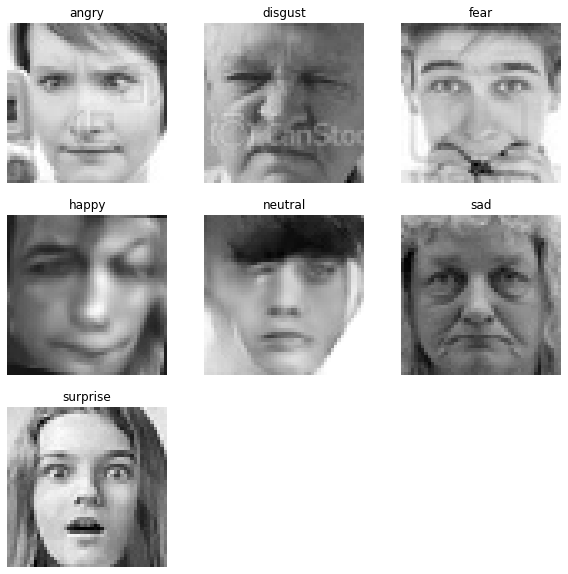

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))

for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 48, 48, 3)`. This is a batch of 32 images of shape `48x48x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

NameError: ignored

### Create the model - Base CNN
#### Todo: Create a CNN model, which can accurately detect 7 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
num_classes = 7


In [ ]:
### Your code goes here

num_classes = 7

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        1

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
1168/1168 [==============================] - 36s 6ms/step - loss: 1.4579 - accuracy: 0.4496 - val_loss: 1.1215 - val_accuracy: 0.6004
Epoch 2/20
1168/1168 [==============================] - 5s 4ms/step - loss: 0.9954 - accuracy: 0.6388 - val_loss: 0.9522 - val_accuracy: 0.6468
Epoch 3/20
1168/1168 [==============================] - 5s 4ms/step - loss: 0.8405 - accuracy: 0.6910 - val_loss: 0.8885 - val_accuracy: 0.6742
Epoch 4/20
1168/1168 [==============================] - 5s 4ms/step - loss: 0.7507 - accuracy: 0.7226 - val_loss: 0.8608 - val_accuracy: 0.6825
Epoch 5/20
1168/1168 [==============================] - 5s 4ms/step - loss: 0.6738 - accuracy: 0.7518 - val_loss: 0.8612 - val_accuracy: 0.6894
Epoch 6/20
1168/1168 [==============================] - 5s 4ms/step - loss: 0.6076 - accuracy: 0.7778 - val_loss: 0.9255 - val_accuracy: 0.6822
Epoch 7/20
1168/1168 [==============================] - 5s 4ms/step - loss: 0.5425 - accuracy: 0.8026 - val_loss: 0.8964 - val_accuracy

### Visualizing training results

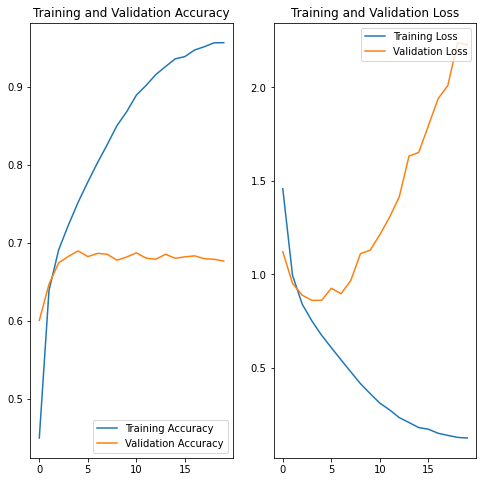

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_accuracy)
print('\nTest loss:', test_loss)

225/225 - 2s - loss: 3.5218 - accuracy: 0.4978 - 2s/epoch - 8ms/step

Test accuracy: 0.4977709650993347

Test loss: 3.521818161010742


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Observations
We can see in above plot for training and validation accuracy that 

*   While training accuracy increases linearly with epochs, validation accuracy remains between 53% to 55% approximately most of the time.
*   Training and validation acuracy difference is too high which is a sign that model is overfitting

 



### Data Augmentation - Random Crop & base CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomCrop(40, 40),
   
  ]
)

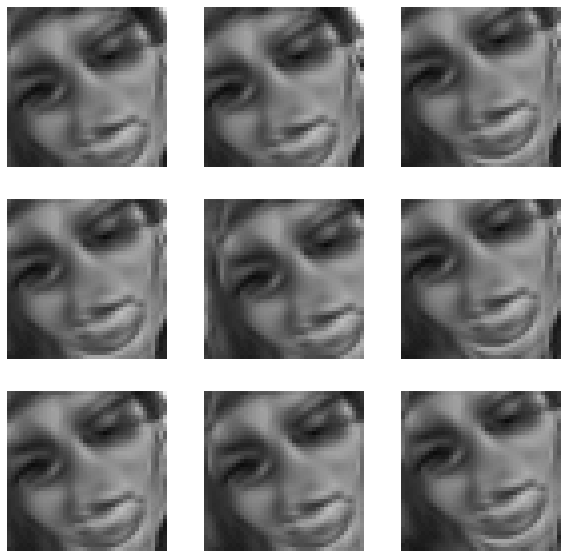

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
1168/1168 [==============================] - 7s 5ms/step - loss: 1.7839 - accuracy: 0.2458 - val_loss: 1.6837 - val_accuracy: 0.3213
Epoch 2/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.6361 - accuracy: 0.3532 - val_loss: 1.5195 - val_accuracy: 0.4221
Epoch 3/100
1168/1168 [==============================] - 7s 6ms/step - loss: 1.4971 - accuracy: 0.4273 - val_loss: 1.3891 - val_accuracy: 0.4842
Epoch 4/100
1168/1168 [==============================] - 8s 7ms/step - loss: 1.3995 - accuracy: 0.4738 - val_loss: 1.2865 - val_accuracy: 0.5284
Epoch 5/100
1168/1168 [==============================] - 8s 6ms/step - loss: 1.3264 - accuracy: 0.5039 - val_loss: 1.2338 - val_accuracy: 0.5467
Epoch 6/100
1168/1168 [==============================] - 8s 7ms/step - loss: 1.2711 - accuracy: 0.5278 - val_loss: 1.2114 - val_accuracy: 0.5581
Epoch 7/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.2349 - accuracy: 0.5408 - val_loss: 1.1087 - val_ac

### Visualizing the results

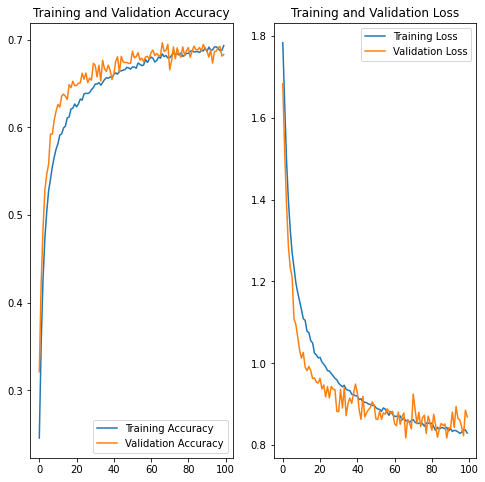

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation - Random Rotation & base CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

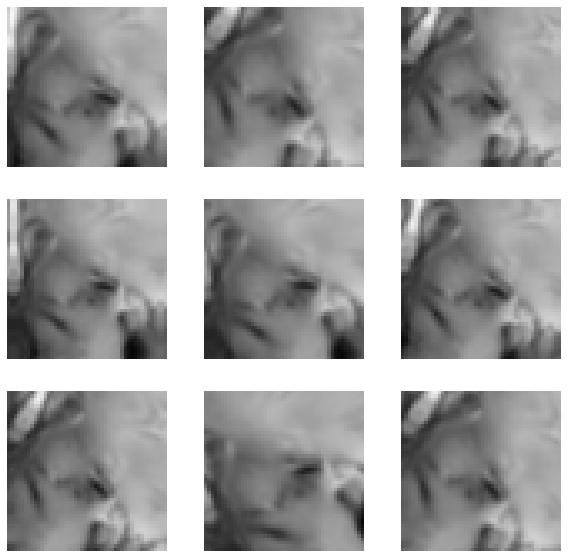

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
1168/1168 [==============================] - 7s 5ms/step - loss: 1.7270 - accuracy: 0.2875 - val_loss: 1.5556 - val_accuracy: 0.4080
Epoch 2/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.5214 - accuracy: 0.4143 - val_loss: 1.3468 - val_accuracy: 0.5069
Epoch 3/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.3376 - accuracy: 0.5056 - val_loss: 1.2695 - val_accuracy: 0.5411
Epoch 4/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.2166 - accuracy: 0.5554 - val_loss: 1.1903 - val_accuracy: 0.5704
Epoch 5/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.1459 - accuracy: 0.5792 - val_loss: 1.1321 - val_accuracy: 0.5936
Epoch 6/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.1007 - accuracy: 0.5991 - val_loss: 1.0360 - val_accuracy: 0.6206
Epoch 7/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.0499 - accuracy: 0.6153 - val_loss: 1.1305 - val_ac

### Visualizing the results

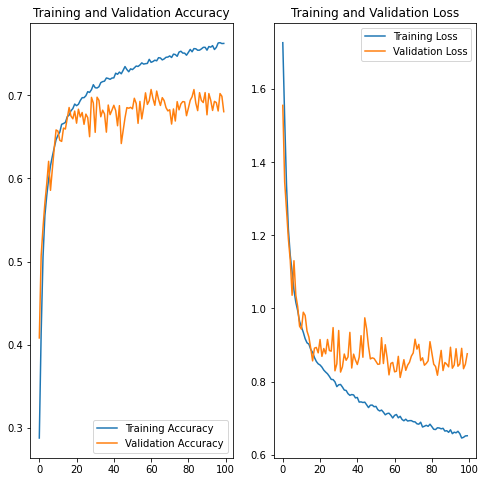

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augentation Vertical Reflection & base CNN


In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(mode="vertical", seed=12),
    
  ]
)

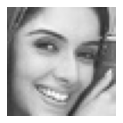

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(2, 2))
for images, _ in train_ds.take(1):
  augmented_images = data_augmentation(images)
  #ax = plt.subplot(2, 1, i + 1)
  plt.imshow(augmented_images[0].numpy().astype("uint8"))
  plt.axis("off")

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.6608 - accuracy: 0.3315 - val_loss: 1.3935 - val_accuracy: 0.4912
Epoch 2/100
1168/1168 [==============================] - 5s 5ms/step - loss: 1.2457 - accuracy: 0.5417 - val_loss: 1.0732 - val_accuracy: 0.6090
Epoch 3/100
1168/1168 [==============================] - 5s 4ms/step - loss: 1.0519 - accuracy: 0.6127 - val_loss: 0.9747 - val_accuracy: 0.6376
Epoch 4/100
1168/1168 [==============================] - 6s 5ms/step - loss: 0.9598 - accuracy: 0.6451 - val_loss: 0.9446 - val_accuracy: 0.6450
Epoch 5/100
1168/1168 [==============================] - 5s 5ms/step - loss: 0.9035 - accuracy: 0.6621 - val_loss: 0.9026 - val_accuracy: 0.6604
Epoch 6/100
1168/1168 [==============================] - 5s 4ms/step - loss: 0.8613 - accuracy: 0.6798 - val_loss: 0.9047 - val_accuracy: 0.6618
Epoch 7/100
1168/1168 [==============================] - 5s 4ms/step - loss: 0.8276 - accuracy: 0.6910 - val_loss: 0.8916 - val_ac

### Visualizing the results

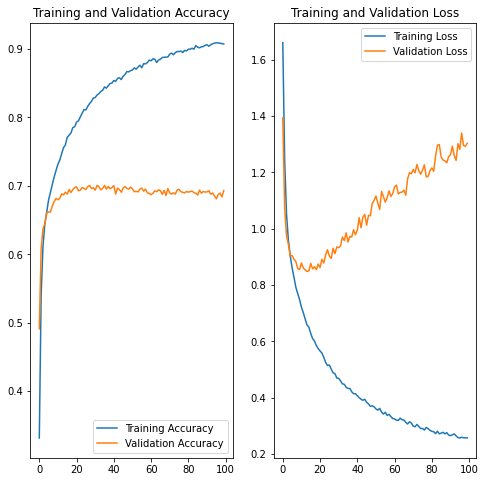

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation Horizontal Flip & base CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", seed=12),
    
  ]
)

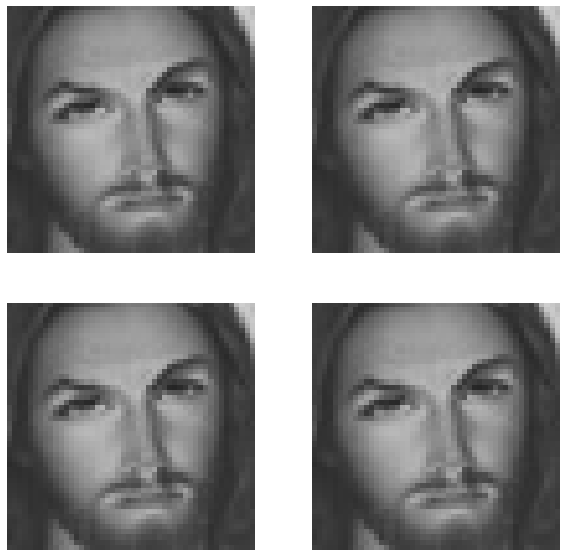

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(4):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.5792 - accuracy: 0.3790 - val_loss: 1.2608 - val_accuracy: 0.5517
Epoch 2/100
1168/1168 [==============================] - 5s 5ms/step - loss: 1.1685 - accuracy: 0.5717 - val_loss: 1.0463 - val_accuracy: 0.6200
Epoch 3/100
1168/1168 [==============================] - 5s 4ms/step - loss: 0.9930 - accuracy: 0.6345 - val_loss: 0.9213 - val_accuracy: 0.6597
Epoch 4/100
1168/1168 [==============================] - 5s 4ms/step - loss: 0.8965 - accuracy: 0.6681 - val_loss: 0.9255 - val_accuracy: 0.6613
Epoch 5/100
1168/1168 [==============================] - 5s 4ms/step - loss: 0.8378 - accuracy: 0.6899 - val_loss: 0.8491 - val_accuracy: 0.6803
Epoch 6/100
1168/1168 [==============================] - 5s 4ms/step - loss: 0.8003 - accuracy: 0.7016 - val_loss: 0.8396 - val_accuracy: 0.6863
Epoch 7/100
1168/1168 [==============================] - 5s 5ms/step - loss: 0.7728 - accuracy: 0.7126 - val_loss: 0.8129 - val_ac

### Visualizing the results

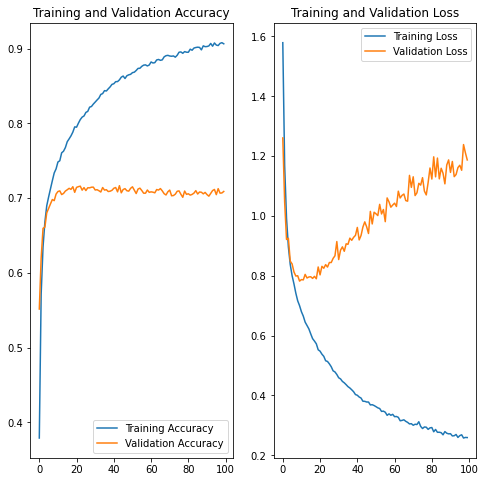

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_accuracy)
print('\nTest loss:', test_loss)

225/225 - 2s - loss: 1.8931 - accuracy: 0.5393 - 2s/epoch - 8ms/step

Test accuracy: 0.539286732673645

Test loss: 1.8931469917297363


### Data Augmentation Translation & base CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3), fill_mode='reflect',interpolation='bilinear',fill_value=0.0, seed=12),
    
  ]
)

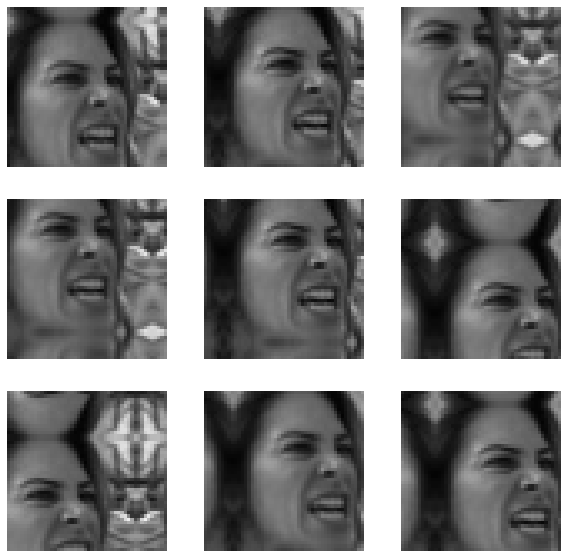

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.8017 - accuracy: 0.2206 - val_loss: 1.7604 - val_accuracy: 0.2589
Epoch 2/100
1168/1168 [==============================] - 5s 5ms/step - loss: 1.7539 - accuracy: 0.2630 - val_loss: 1.6687 - val_accuracy: 0.3274
Epoch 3/100
1168/1168 [==============================] - 5s 5ms/step - loss: 1.6928 - accuracy: 0.3138 - val_loss: 1.5691 - val_accuracy: 0.3989
Epoch 4/100
1168/1168 [==============================] - 5s 5ms/step - loss: 1.6149 - accuracy: 0.3641 - val_loss: 1.5109 - val_accuracy: 0.4309
Epoch 5/100
1168/1168 [==============================] - 5s 5ms/step - loss: 1.5471 - accuracy: 0.4035 - val_loss: 1.3811 - val_accuracy: 0.4847
Epoch 6/100
1168/1168 [==============================] - 5s 5ms/step - loss: 1.4945 - accuracy: 0.4279 - val_loss: 1.3543 - val_accuracy: 0.5109
Epoch 7/100
1168/1168 [==============================] - 5s 5ms/step - loss: 1.4434 - accuracy: 0.4536 - val_loss: 1.2634 - val_ac

### Visualizing the results

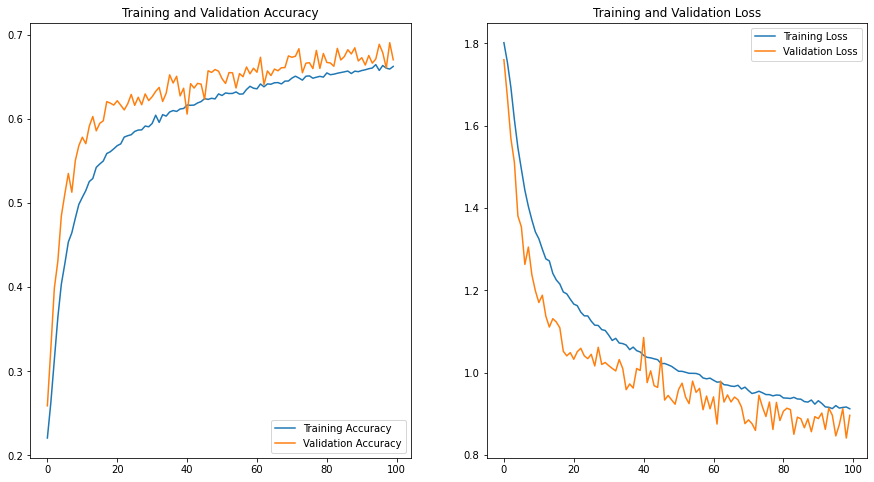

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation Translation and Horizontal Flip & base CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", seed=12),
    layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3), fill_mode='reflect',interpolation='bilinear',fill_value=0.0, seed=12),
    
  ]
)

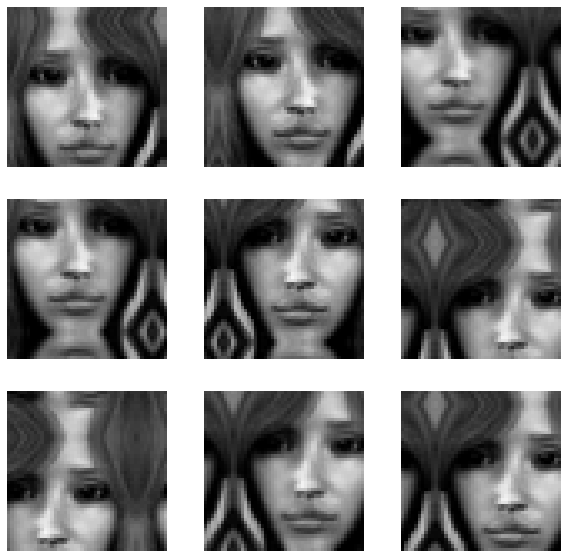

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
1168/1168 [==============================] - 7s 5ms/step - loss: 1.8019 - accuracy: 0.2228 - val_loss: 1.7543 - val_accuracy: 0.2617
Epoch 2/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.7628 - accuracy: 0.2559 - val_loss: 1.7025 - val_accuracy: 0.3022
Epoch 3/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.7153 - accuracy: 0.2903 - val_loss: 1.6185 - val_accuracy: 0.3598
Epoch 4/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.6594 - accuracy: 0.3368 - val_loss: 1.5519 - val_accuracy: 0.4037
Epoch 5/100
1168/1168 [==============================] - 7s 6ms/step - loss: 1.6098 - accuracy: 0.3618 - val_loss: 1.5025 - val_accuracy: 0.4299
Epoch 6/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.5632 - accuracy: 0.3896 - val_loss: 1.4314 - val_accuracy: 0.4517
Epoch 7/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.5261 - accuracy: 0.4060 - val_loss: 1.3926 - val_ac

### Visualizing the results

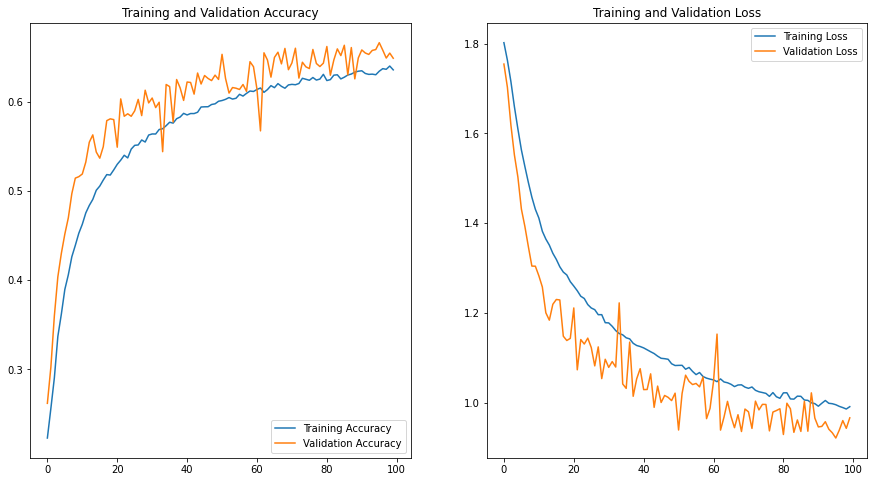

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation Translation and Horizontal Flip & base CNN + more layers

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", seed=12),
    layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3), fill_mode='reflect',interpolation='bilinear',fill_value=0.0, seed=12),
    
  ]
)

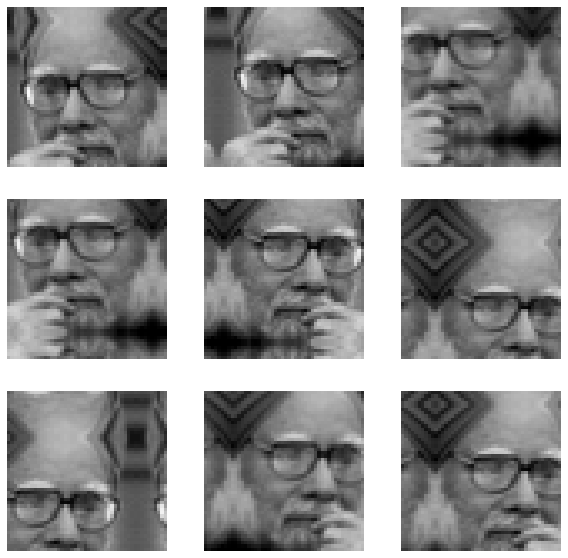

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])




### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
1168/1168 [==============================] - 9s 7ms/step - loss: 1.8077 - accuracy: 0.2165 - val_loss: 1.7802 - val_accuracy: 0.2400
Epoch 2/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.7679 - accuracy: 0.2510 - val_loss: 1.7392 - val_accuracy: 0.2787
Epoch 3/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.7286 - accuracy: 0.2890 - val_loss: 1.6443 - val_accuracy: 0.3486
Epoch 4/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.6805 - accuracy: 0.3201 - val_loss: 1.5686 - val_accuracy: 0.3992
Epoch 5/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.6324 - accuracy: 0.3512 - val_loss: 1.5207 - val_accuracy: 0.4173
Epoch 6/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.5851 - accuracy: 0.3757 - val_loss: 1.4463 - val_accuracy: 0.4541
Epoch 7/100
1168/1168 [==============================] - 6s 5ms/step - loss: 1.5451 - accuracy: 0.3974 - val_loss: 1.3663 - val_ac

### Visualizing the results

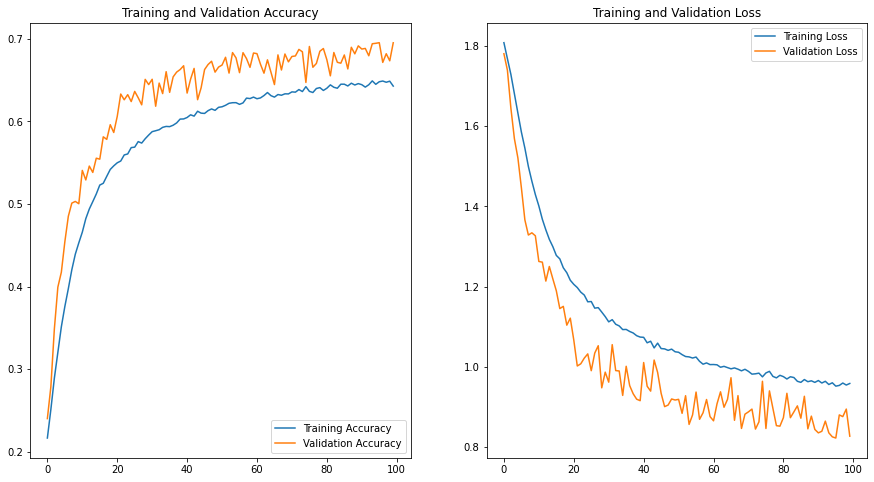

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation Translation and Horizontal Flip & Reference CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", seed=12),
    layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3), fill_mode='reflect',interpolation='bilinear',fill_value=0.0, seed=12),
    
  ]
)

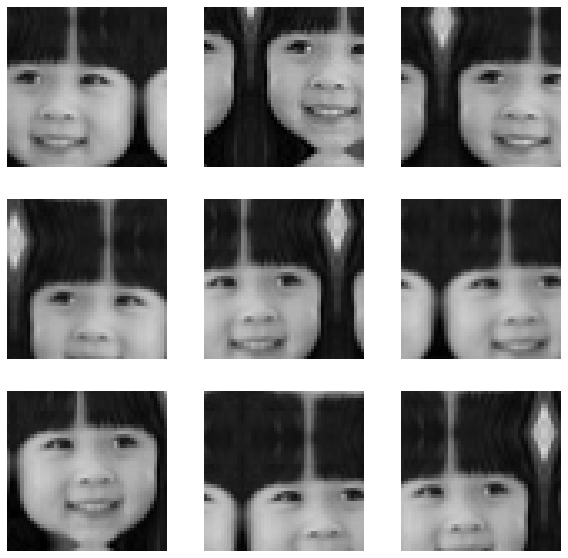

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(384, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(192, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(384, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Dense(num_classes)
  
])

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:


## Your code goes here, note: train your model for 20 epochs


epochs = 200
#earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/FER2013/{epoch:02d}-{val_loss:.2f}-cnn-ganonlytraining.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1, callbacks=(mcp_save))

Epoch 1/200
321/321 [==============================] - 95s 215ms/step - loss: 2.0658 - accuracy: 0.2113 - val_loss: 1.8241 - val_accuracy: 0.2494
Epoch 2/200
321/321 [==============================] - 57s 178ms/step - loss: 1.8254 - accuracy: 0.2510 - val_loss: 1.8161 - val_accuracy: 0.2400
Epoch 3/200
321/321 [==============================] - 57s 177ms/step - loss: 1.7436 - accuracy: 0.2850 - val_loss: 1.8819 - val_accuracy: 0.2501
Epoch 4/200
321/321 [==============================] - 57s 178ms/step - loss: 1.6303 - accuracy: 0.3516 - val_loss: 1.7806 - val_accuracy: 0.3114
Epoch 5/200
321/321 [==============================] - 57s 177ms/step - loss: 1.4869 - accuracy: 0.4231 - val_loss: 1.6321 - val_accuracy: 0.3940
Epoch 6/200
321/321 [==============================] - 57s 177ms/step - loss: 1.3475 - accuracy: 0.4869 - val_loss: 1.6550 - val_accuracy: 0.4191
Epoch 7/200
321/321 [==============================] - 57s 177ms/step - loss: 1.2430 - accuracy: 0.5341 - val_loss: 1.6152 -

In [ ]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/trained_ganonlytraining_cnn.h5')

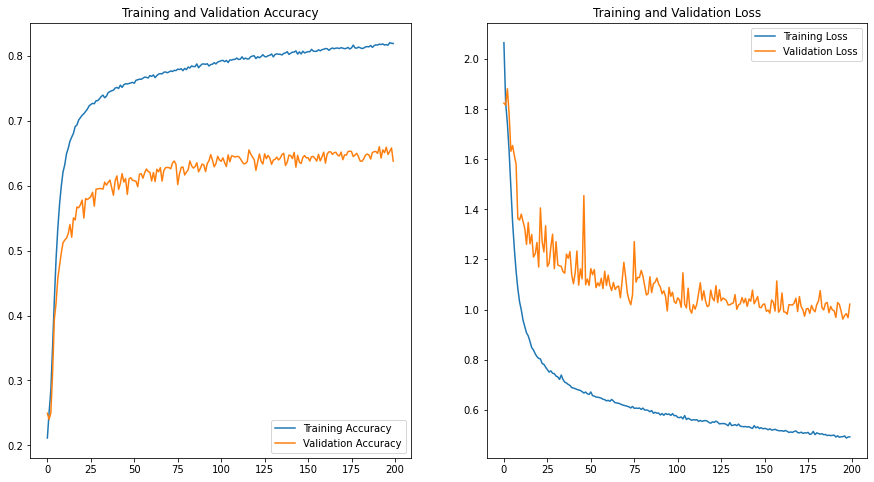

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

57/57 - 5s - loss: 1.0115 - accuracy: 0.6330 - 5s/epoch - 87ms/step

Test Accuracy: 0.6330454349517822

Test Loss: 1.0115423202514648


In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/FER2013/196-0.96-cnn-ganonlytraining.hdf5')
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

57/57 - 3s - loss: 0.9463 - accuracy: 0.6580 - 3s/epoch - 58ms/step

Test Accuracy: 0.6579827070236206

Test Loss: 0.9462552070617676


In [ ]:
#Load partly trained model
model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/trained_ganonlytraining_cnn.h5')

In [ ]:
epochs = 50
#earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/FER2013/1-{epoch:02d}-{val_loss:.2f}-cnn-ganonlytraining.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1, callbacks=(mcp_save))

Epoch 1/50
321/321 [==============================] - 73s 178ms/step - loss: 0.4911 - accuracy: 0.8185 - val_loss: 1.0284 - val_accuracy: 0.6469
Epoch 2/50
321/321 [==============================] - 57s 177ms/step - loss: 0.4876 - accuracy: 0.8190 - val_loss: 0.9817 - val_accuracy: 0.6541
Epoch 3/50
321/321 [==============================] - 57s 176ms/step - loss: 0.4883 - accuracy: 0.8185 - val_loss: 0.9891 - val_accuracy: 0.6530
Epoch 4/50
321/321 [==============================] - 57s 177ms/step - loss: 0.4857 - accuracy: 0.8194 - val_loss: 1.0060 - val_accuracy: 0.6569
Epoch 5/50
321/321 [==============================] - 57s 177ms/step - loss: 0.4900 - accuracy: 0.8185 - val_loss: 1.0076 - val_accuracy: 0.6525
Epoch 6/50
321/321 [==============================] - 57s 177ms/step - loss: 0.4813 - accuracy: 0.8212 - val_loss: 1.0060 - val_accuracy: 0.6490
Epoch 7/50
321/321 [==============================] - 57s 177ms/step - loss: 0.4800 - accuracy: 0.8237 - val_loss: 0.9990 - val_ac

### Visualizing the results

In [ ]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/1-trained_ganonlytraining_cnn.h5')



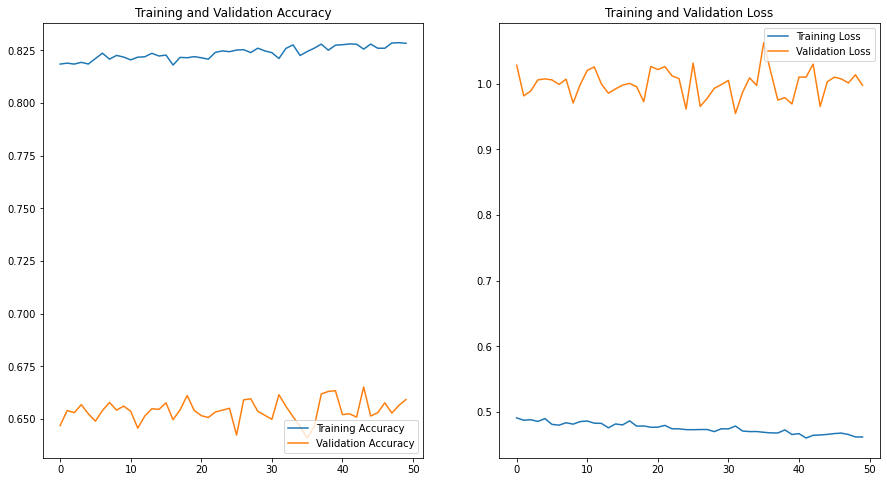

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

57/57 - 4s - loss: 0.9703 - accuracy: 0.6578 - 4s/epoch - 68ms/step

Test Accuracy: 0.6578434109687805

Test Loss: 0.9702885746955872


### Data Augmentation Translation and Horizontal Flip with MobileNetv2

In [ ]:
batch_size = 32  # try 4, 8, 16, 32, 64, 128, 256 dependent on CPU/GPU memory capacity (powers of 2 values).

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds_original = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_original,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(224, 224),
  batch_size=batch_size, shuffle=True)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds_GAN = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_GAN,
  seed=123,
  #validation_split = 0.2,
  #subset = 'training',
  image_size=(224, 224),
  batch_size=batch_size, shuffle=True)

Found 18001 files belonging to 7 classes.


In [ ]:
train_ds=train_ds_original.concatenate(train_ds_GAN)
train_ds.shuffle(40000)


<ShuffleDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_original,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(224, 224),
  batch_size=batch_size, shuffle=True)

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [ ]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  #validation_split = 0.2,
  #subset = 'validation',
  image_size=(224, 224),
  batch_size=batch_size)

Found 7178 files belonging to 7 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds_GAN.class_names
print(class_names)
class_names = train_ds_original.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=(-0.2,0.3), height_shift_range=(-0.2,0.3), validation_split=0.20)
#val_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=(-0.2,0.3), height_shift_range=(-0.2,0.3), validation_split=0.20)



train_ds = train_datagen.flow_from_directory(
        '/content/fer2013-augmented-with-bicogan/FER2013 Augmented with GAN/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical', shuffle=True, subset='training' )
val_ds = train_datagen.flow_from_directory(
        '/content/fer2013-augmented-with-bicogan/FER2013 Augmented with GAN/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical', shuffle=True, subset='validation' )



test_datagen = ImageDataGenerator(rescale=1./255)

test_ds = test_datagen.flow_from_directory(
        '/content/fer2013/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')


Found 37368 images belonging to 7 classes.
Found 9341 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", seed=12),
    layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3), fill_mode='reflect',interpolation='bilinear',fill_value=0.0, seed=12),
    
  ]
)

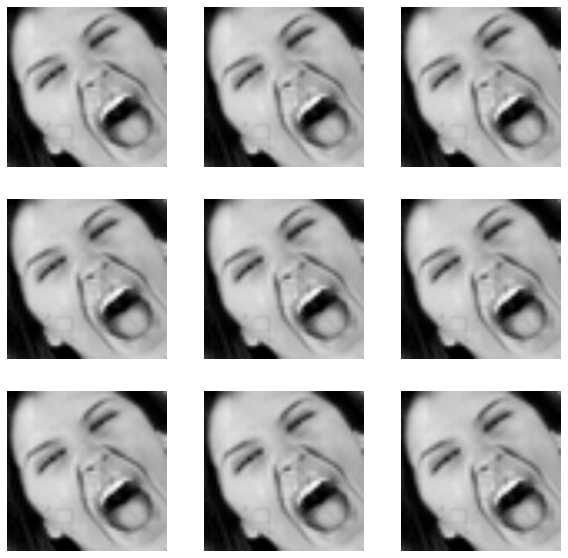

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
model = tf.keras.applications.MobileNetV2()
base_input = model.layers[0].input
base_output = model.layers[-2].output
final_output = layers.Dense(128)(base_output) 
final_output = layers.Activation("relu")(final_output) 
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation("relu")(final_output)
final_output = layers.Dense(7, activation="softmax")(final_output) 
model = keras.Model(inputs = base_input, outputs = final_output)
model.summary()

14548992/14536120 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                             

### Compiling the model

In [ ]:
## Your code goes here
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the model

In [ ]:

## Your code goes here, note: train your model for 50 epochs


epochs = 50
#earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/FER2013/{epoch:02d}-{val_loss:.2f}-MobileNet-ganonlytraining.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1, callbacks=(mcp_save))

Epoch 1/50
292/292 [==============================] - 566s 2s/step - loss: 1.3685 - accuracy: 0.4749 - val_loss: 6.9183 - val_accuracy: 0.1321
Epoch 2/50
292/292 [==============================] - 542s 2s/step - loss: 1.0371 - accuracy: 0.6160 - val_loss: 6.9197 - val_accuracy: 0.1321
Epoch 3/50
292/292 [==============================] - 540s 2s/step - loss: 0.9351 - accuracy: 0.6566 - val_loss: 9.3008 - val_accuracy: 0.1321
Epoch 4/50
292/292 [==============================] - 548s 2s/step - loss: 0.8762 - accuracy: 0.6752 - val_loss: 15.0962 - val_accuracy: 0.1327
Epoch 5/50
292/292 [==============================] - 549s 2s/step - loss: 0.8342 - accuracy: 0.6894 - val_loss: 5.7803 - val_accuracy: 0.1612
Epoch 6/50
292/292 [==============================] - 548s 2s/step - loss: 0.8034 - accuracy: 0.7016 - val_loss: 4.8147 - val_accuracy: 0.2440
Epoch 7/50
292/292 [==============================] - 545s 2s/step - loss: 0.7815 - accuracy: 0.7106 - val_loss: 3.5520 - val_accuracy: 0.234

In [ ]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/trained_ganonlytraining_Mobilenet_datagenerator.h5')

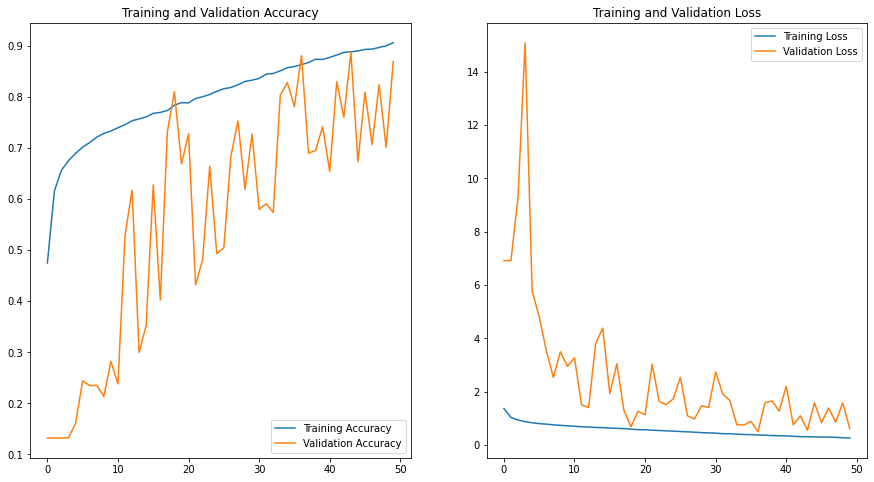

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

57/57 - 8s - loss: 3.3713 - accuracy: 0.5403 - 8s/epoch - 134ms/step

Test Accuracy: 0.5402619242668152

Test Loss: 3.3713455200195312
